**Data Exploration**

In [41]:
import pandas as pd

file_path = "D:/NexusInfo Internship/Project 3/twitter dataset.csv"
df = pd.read_csv(file_path, names=["target", "id", "date", "flag", "user", "text"], encoding="ISO-8859-1", skiprows = 1)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048574 non-null  int64 
 1   id      1048574 non-null  int64 
 2   date    1048574 non-null  object
 3   flag    1048574 non-null  object
 4   user    1048574 non-null  object
 5   text    1048574 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB
None
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, 

In [42]:
print(df["target"].value_counts())
print(df["target"].unique())



0    800000
4    248574
Name: target, dtype: int64
[0 4]


In [43]:
print(df.isnull().sum())

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [44]:
for tweet in df["text"].sample(5):
    print(tweet)

@duckofalltrades It's the only time it's quiet with a toddler, naps aren't reliable anymore 
@randfish I miss the SF fog  Watching it roll in when you have nothing to do, yeah baby!
@acryfromthesoul I mean, they were considered guilty, but of a minor offense. There are many movies about it... it's not a legend. 
@markmicciche that is terrible   I feel bad for you, this could really affect your game with the ladies, waaaait.  Seriously though 
p.s. the whole word limit thing sucks !  i have to write it in parts ! boo hoo i'm sad. no i'm not. i'm in thailand, oh yes i am! xxx NEA


In [45]:
df["date"] = pd.to_datetime(df["date"])

# Display date-related information
print(df["date"].describe())

C:\Users\ghanc\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\ghanc\AppData\Local\Temp\ipykernel_13144\149389228.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df["date"].describe())


count                 1048574
unique                 662453
top       2009-05-22 05:10:17
freq                       17
first     2009-04-06 22:19:45
last      2009-06-25 10:28:31
Name: date, dtype: object


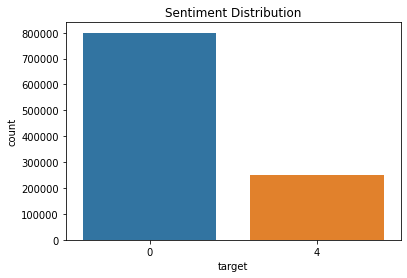

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
sns.countplot(x="target", data=df)
plt.title("Sentiment Distribution")
plt.show()

**Data Cleaning**

In [47]:
print(df.isnull().sum())

df = df.dropna()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [48]:
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


In [49]:
df = df.drop(columns=['id', 'flag', 'user'])

**Text Preprocessing**

In [50]:
import re

# Remove special characters and links from text
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove links
df['text'] = df['text'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))  # Remove special characters
df['text'] = df['text'].str.lower()  # Convert text to lowercase

In [51]:
# Check unique values in the 'target' column
print(df['target'].unique())

# If there are unexpected values, filter or replace them
df = df[df['target'].isin([0, 4])]

[0 4]


In [52]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
# nltk.download('stopwords')

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])


In [53]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghanc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ghanc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
from nltk.stem import WordNetLemmatizer


# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [55]:
from sklearn.utils import resample

# Handle imbalanced classes
df_class_0 = df[df['target'] == 0]
df_class_4 = df[df['target'] == 4]

df_class_0_resampled = resample(df_class_0, replace=True, n_samples=len(df_class_4), random_state=42)
df_resampled = pd.concat([df_class_0_resampled, df_class_4])

In [56]:
# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

**Exploratory Data Analysis (EDA)**

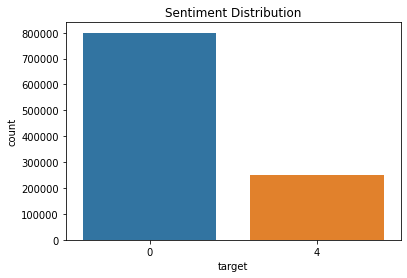

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.show()

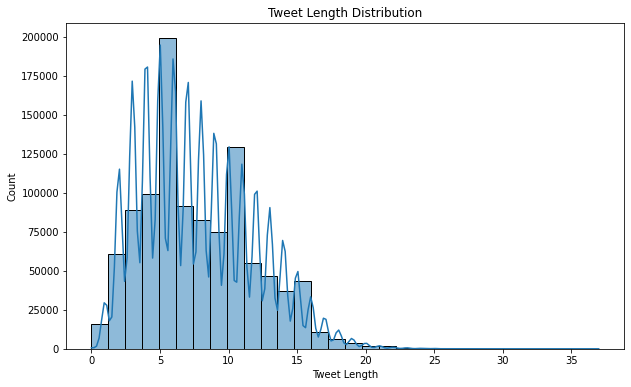

In [58]:
# Calculate tweet lengths
df['tweet_length'] = df['text'].apply(len)

# Plot tweet length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.show()

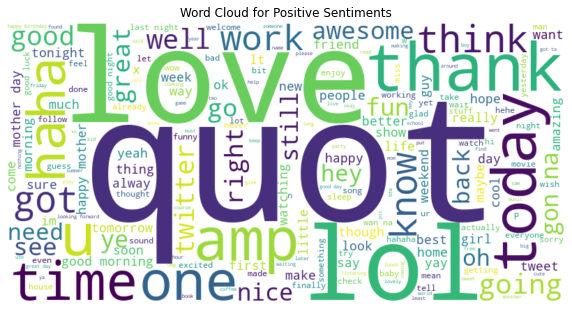

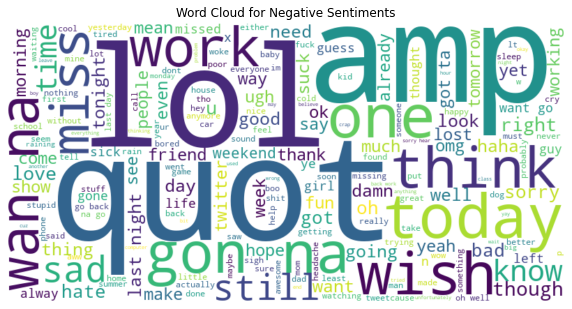

In [59]:
from wordcloud import WordCloud

# Convert lists of words to strings for positive and negative sentiments
positive_tweets = ' '.join(df[df['target'] == 4]['text'].apply(lambda x: ' '.join(x)))
negative_tweets = ' '.join(df[df['target'] == 0]['text'].apply(lambda x: ' '.join(x)))

# Plot word cloud for positive sentiments
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

# Plot word cloud for negative sentiments
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

**Sentiment Distribution**

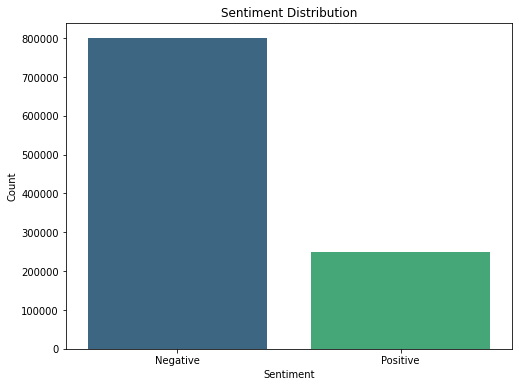

In [60]:
sentiment_mapping = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
df['sentiment'] = df['target'].map(sentiment_mapping)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

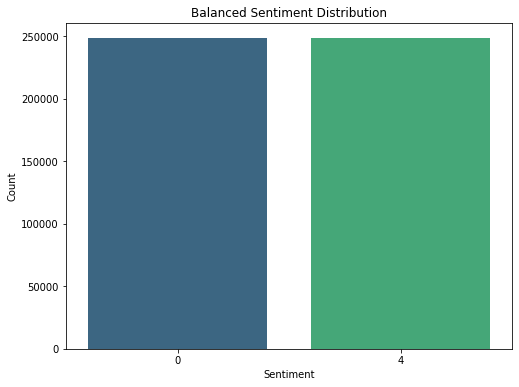

In [61]:
from sklearn.utils import resample

# Downsample the negative class to match the size of the positive class
df_class_0 = df[df['target'] == 0]
df_class_4 = df[df['target'] == 4]

df_class_0_downsampled = resample(df_class_0, replace=False, n_samples=len(df_class_4), random_state=42)
df_balanced = pd.concat([df_class_0_downsampled, df_class_4])

# Plot the balanced sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_balanced, palette='viridis')
plt.title('Balanced Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**Word Frequency Analysis**

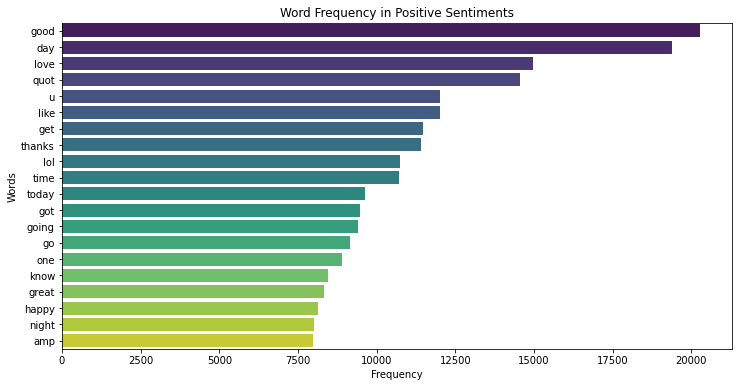

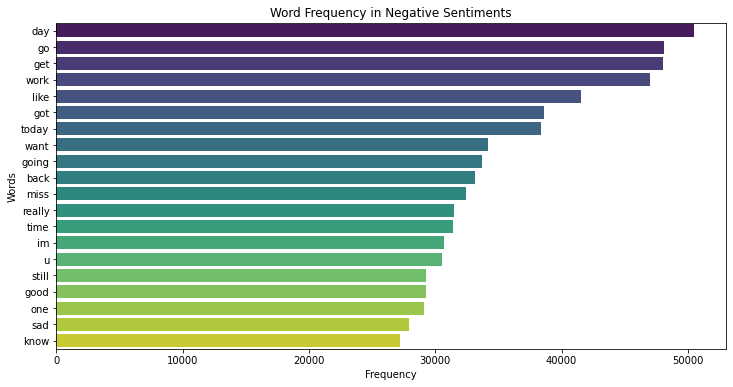

In [62]:
from wordcloud import WordCloud
from collections import Counter

# Separate positive and negative tweets
positive_tweets = ' '.join(df[df['target'] == 4]['text'].apply(lambda x: ' '.join(x)))
negative_tweets = ' '.join(df[df['target'] == 0]['text'].apply(lambda x: ' '.join(x)))

# Function to plot word frequency bar chart
def plot_word_frequency_bar_chart(text, title):
    word_counts = Counter(text.split())
    common_words = word_counts.most_common(20)  # Adjust the number of common words to display

    plt.figure(figsize=(12, 6))
    sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words], palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()


# Plot word frequency bar chart for positive sentiments
plot_word_frequency_bar_chart(positive_tweets, 'Word Frequency in Positive Sentiments')


# Plot word frequency bar chart for negative sentiments
plot_word_frequency_bar_chart(negative_tweets, 'Word Frequency in Negative Sentiments')

**Temporal Analysis**

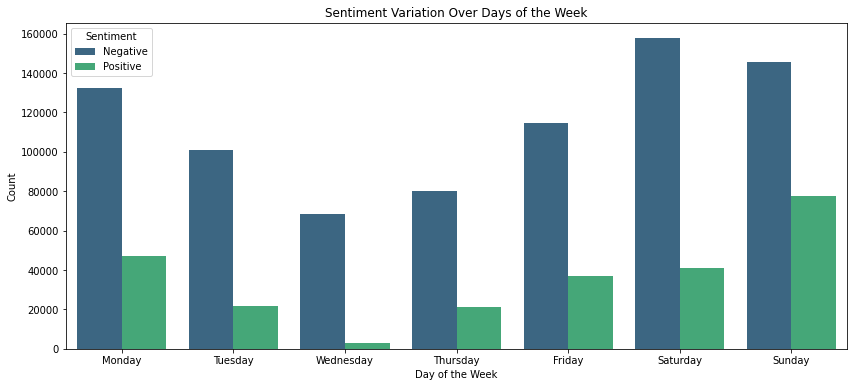

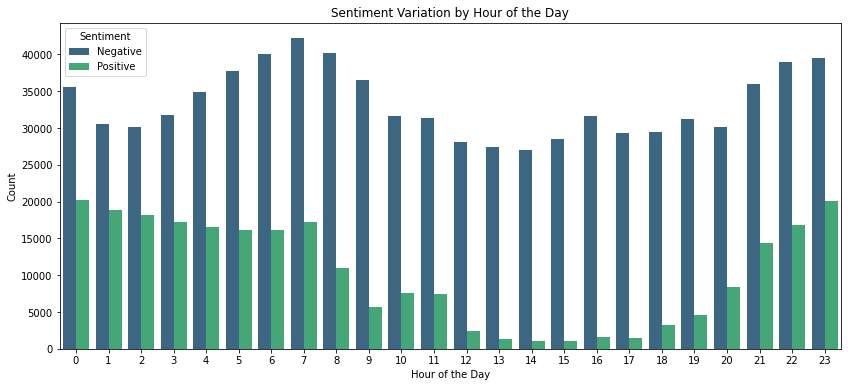

In [63]:
# Extract additional time-related features if needed
df['day_of_week'] = df['date'].dt.day_name()
df['hour_of_day'] = df['date'].dt.hour

# Plot sentiment variation over time
plt.figure(figsize=(14, 6))
sns.countplot(x='day_of_week', hue='sentiment', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sentiment Variation Over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Plot sentiment variation by hour of the day
plt.figure(figsize=(14, 6))
sns.countplot(x='hour_of_day', hue='sentiment', data=df, palette='viridis')
plt.title('Sentiment Variation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

**Sentiment Prediction Model**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert the list of words back to a string
X_train_str = X_train.apply(lambda x: ' '.join(x))
X_test_str = X_test.apply(lambda x: ' '.join(x))

# Create a pipeline with a TF-IDF vectorizer and a Random Forest Classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train_str, y_train)

# Predict sentiment on the test set
y_pred = model.predict(X_test_str)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8161

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89    159869
           4       0.70      0.39      0.50     49846

    accuracy                           0.82    209715
   macro avg       0.77      0.67      0.70    209715
weighted avg       0.80      0.82      0.80    209715


Confusion Matrix:
[[151627   8242]
 [ 30321  19525]]


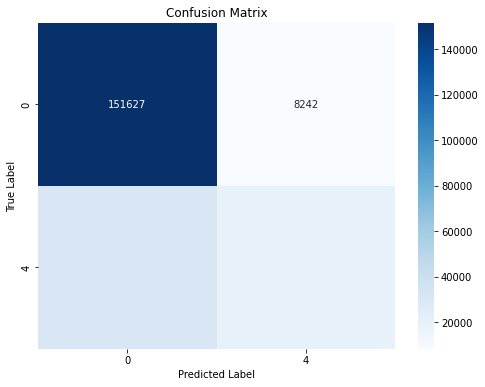

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True ,fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Feature Importance**

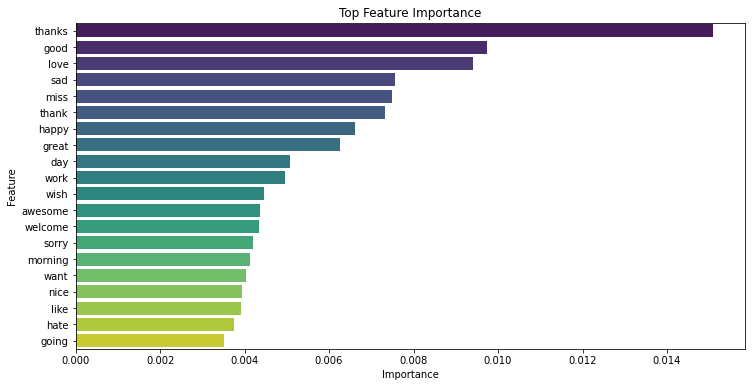

In [70]:
# Get feature names from the TF-IDF vectorizer
feature_names = model.named_steps['tfidf'].get_feature_names_out()

# Get feature importances from the RandomForestClassifier
feature_importances = model.named_steps['classifier'].feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (adjust N based on your preference)
top_n_features = 20
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n_features), palette='viridis')
plt.title('Top Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [72]:
from joblib import dump
dump(model, 'sentiment_model.joblib')
tfidf_vectorizer = model.named_steps['tfidf']
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']